# Загрузка Pandas и очистка данных

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import re
import datetime
from datetime import datetime, timedelta
from sklearn.preprocessing import PolynomialFeatures

In [27]:
df = pd.read_csv('main_task_new.csv')
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [190]:
# Ваш код по очистке данных и генерации новых признаков
# При необходимости добавьте ячейки

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### Изучим информацию о ценах

In [4]:
df['Price Range'].dropna().value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: Price Range, dtype: int64

### Определим количество городов

In [5]:
df['City'].dropna().nunique()

31

### Исследуем информацию о кухнях

In [46]:
# выделим информацию о кухнях в отдельный объект Series
cuisine = df['Cuisine Style'].dropna()

# создадим функцию для преобразования формата str, в котором записан перечень кухонь, в список
def split_cuisine(string):
    return string[2:-2].split("', '")

# применим созданную функцию для удобства дальнейшей работы
new_cuisine = cuisine.apply(split_cuisine)
display(new_cuisine)
cuisine_list = new_cuisine.explode().value_counts()
display(cuisine_list)

# создадим отдельный Series с количеством кухонь для каждого ресторана
count_cuisine = new_cuisine.apply(lambda x: len(x))
display(count_cuisine)

# рассчитаем среднее количество кухонь для всех ресторанов из df
print('Среднее количество кухонь в одном ресторане:', (count_cuisine.sum() + len(df) - len(new_cuisine))/len(df))

0                        [European, French, International]
2        [Japanese, Sushi, Asian, Grill, Vegetarian Fri...
4          [German, Central European, Vegetarian Friendly]
6                                         [Italian, Pizza]
7                                                [Italian]
                               ...                        
39995    [Italian, Vegetarian Friendly, Vegan Options, ...
39996    [French, American, Bar, European, Vegetarian F...
39997                                    [Japanese, Sushi]
39998    [Polish, European, Eastern European, Central E...
39999                                            [Spanish]
Name: Cuisine Style, Length: 30717, dtype: object

Vegetarian Friendly    11189
European               10060
Mediterranean           6277
Italian                 5964
Vegan Options           4486
                       ...  
Burmese                    1
Xinjiang                   1
Latvian                    1
Yunnan                     1
Salvadoran                 1
Name: Cuisine Style, Length: 125, dtype: int64

0        3
2        7
4        3
6        2
7        1
        ..
39995    4
39996    5
39997    2
39998    5
39999    1
Name: Cuisine Style, Length: 30717, dtype: int64

Среднее количество кухонь в одном ресторане: 2.6224


### Изучим информацию о датах оставленных отзывов

In [8]:
pattern = re.compile('\d\d[/]\d\d[/]\d\d\d\d')  # создадим шаблон для поиска даты, записанной в строковой величине

reviews_list = []
df['Reviews'].apply(lambda x: reviews_list.append(x))
result = []
for string in reviews_list:
    result.append(pattern.findall(string))  # сформируем список с датами в формате str

In [9]:
# на основании списка создадим DataFrame
reviews_date = pd.DataFrame(result, columns = ['first_review', 'second_review']).dropna(axis=0, how='all')
display(reviews_date)

,first_review,second_review
0,12/31/2017,11/20/2017
1,07/06/2017,06/19/2016
2,01/08/2018,01/06/2018
4,11/18/2017,02/19/2017
5,09/16/2017,05/31/2017
...,...,...
39995,12/16/2017,11/12/2017
39996,12/21/2017,12/12/2017
39997,11/03/2016,04/12/2008
39998,07/11/2017,06/18/2017


In [10]:
# пропущенные значения, имеющиеся во втором стоблце DateFrame, заполним значениями из первого столбца
reviews_date['second_review'] = reviews_date['second_review'].fillna(reviews_date['first_review'])
display(reviews_date)

# переведём даты в формат datetime
reviews_date_datetime = pd.DataFrame()
reviews_date_datetime['first_review'] = reviews_date['first_review'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
reviews_date_datetime['second_review'] = reviews_date['second_review'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
display(reviews_date_datetime)

,first_review,second_review
0,12/31/2017,11/20/2017
1,07/06/2017,06/19/2016
2,01/08/2018,01/06/2018
4,11/18/2017,02/19/2017
5,09/16/2017,05/31/2017
...,...,...
39995,12/16/2017,11/12/2017
39996,12/21/2017,12/12/2017
39997,11/03/2016,04/12/2008
39998,07/11/2017,06/18/2017


,first_review,second_review
0,2017-12-31,2017-11-20
1,2017-07-06,2016-06-19
2,2018-01-08,2018-01-06
4,2017-11-18,2017-02-19
5,2017-09-16,2017-05-31
...,...,...
39995,2017-12-16,2017-11-12
39996,2017-12-21,2017-12-12
39997,2016-11-03,2008-04-12
39998,2017-07-11,2017-06-18


In [11]:
# Определим максимальную из дат == дата последнего оставленного отзыва
display(reviews_date_datetime.max())

# Опередлим максимальную разницу между датами первого и второго столбца
display((reviews_date_datetime['first_review'] - reviews_date_datetime['second_review']).max())

first_review    2018-02-26
second_review   2018-02-26
dtype: datetime64[ns]

Timedelta('3207 days 00:00:00')

## Сформируем DataFrame для дальнейшего обучения модели

In [137]:
# создадим DataFrame с исходными столбцами формата float
df_float = df[['Ranking', 'Rating', 'Number of Reviews']].copy()

df_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Rating             40000 non-null  float64
 2   Number of Reviews  37457 non-null  float64
dtypes: float64(3)
memory usage: 937.6 KB


### NAN

In [138]:
# Number of Reviews

# создадим столбец, отражающий количество пропусков данного признака
df_float['Number_of_Reviews_isNAN'] = pd.isna(df_float['Number of Reviews']).astype('uint8')
# заменим пропущенные значения количества отзывов о ресторане на среднее значение
df_float['Number of Reviews'].fillna(df_float['Number of Reviews'].mean(), inplace=True)


# Reviews

df_float['Reviews_isNAN'] = pd.isna(df['Reviews']).astype('uint8')


# Price Range

df_float['Price_Range_isNAN'] = pd.isna(df['Price Range']).astype('uint8')


# Cuisine Style

df_float['Cuisine_Style_isNAN'] = pd.isna(df['Cuisine Style']).astype('uint8')

### Feature Engineering

In [139]:
# создадим столбец с количеством типов кухонь в каждом ресторане
# воспользуемся ранее созданным Series
df_float['Cuisine count'] = count_cuisine
df_float['Cuisine count'].fillna(df_float['Cuisine count'].mean(), inplace=True)


# создадим признак, отражающий популряность кухонь, представленных в ресторане
df_float['Cuisine Style'] = new_cuisine   # используем ранее созданный Series
df_float['Cuisine Style'].fillna(0, inplace=True)

def cuisines_sum(cuisines):
    cuisine_sum = 0
    for cuisine in cuisine_list.index:
        if cuisines != 0 and cuisine in cuisines:
            cuisine_sum += cuisine_list[cuisine]
    return cuisine_sum
    
df_float['Cuisine sum'] = df_float['Cuisine Style'].apply(cuisines_sum)


# добавим столбец с уровнем цен, заменив строковые значения на численные
df_float['Price Range'] = df['Price Range']
price_range_dict = {'$$$$': 3,
                    '$$ - $$$': 2,
                    '$': 1}
df_float['Price Range'] = df_float['Price Range'].replace(
    to_replace=price_range_dict)

# заполним пропущенные значения на средний уровень цен в этом городе
df_float['City'] = df['City']
city_mean_price = df_float.groupby('City')['Price Range'].mean()
df_float['Price Range'].fillna(0, inplace=True)

def fill_mean_city_price(row):
    if row['Price Range'] == 0:
        row['Price Range'] = city_mean_price[row.City]
    return row
        
df_float = df_float.apply(fill_mean_city_price, axis=1)


# создадим столбец с количеством отзывов на сайте
df_float['Reviews at Site'] = reviews_date.apply(lambda x: len(x), axis=1)
df_float['Reviews at Site'].fillna(0, inplace=True)


# создадим столбец с разницей между датами отзывов на сайте (в днях)
df_float['Reviews Date Delta'] = (reviews_date_datetime['first_review'] - 
                                  reviews_date_datetime['second_review']).apply(lambda x: x.days)
df_float['Reviews Date Delta'].fillna(0, inplace=True)


# создадим стоблец с годом первого отзыва на сайте
df_float['First Review'] = reviews_date_datetime['first_review'].apply(lambda x: x.year)
df_float['First Review'].fillna(df_float['First Review'].mean(), inplace=True)


# создадим признак со средним значением Ranking по городам
mean_ranking_list = df_float.groupby('City')['Ranking'].mean().sort_values()

def mean_ranking(row):
    return mean_ranking_list[row['City']]
    
df_float['Mean Ranking'] = df_float.apply(mean_ranking, axis=1)


# создадим признак, отражающий уровень расположения ресторана среди всех ресторанов города, выше или ниже среднего значения
# 0 - если место ресторана ниже, чем количество представленных ресторанов от этого города
# 2 - если место ресторана выше среднего значения по данному городу
# 1 - промежуточные
city_ranking_list = df_float['City'].value_counts()

def ranking_level(row):
    if row['Ranking'] < city_ranking_list[row['City']]:
        return 0
    if row['Ranking'] > row['Mean Ranking']:
        return 2
    else:
        return 1
    
df_float['Ranking level'] = df_float.apply(ranking_level, axis=1)


# создадим признак соотношения количества ресторанов в городе к среднему значению Ranking города
def new(row):
    return city_ranking_list[row['City']]/row['Mean Ranking']
    
df_float['new'] = df_float.apply(new, axis=1)


# создадим признак соотношения места ресторана в городе к среднему значению Ranking города
df_float['Ranking Percent'] = df_float['Ranking']/df_float['Mean Ranking']


# на основании существующего признака создадим новый
df_float['new2'] = np.sqrt(df_float['Ranking Percent'])


# создадим признак с численностью населения городов
city_population_dict = {'Paris': 2161000, 
                        'Helsinki': 631695, 
                        'Edinburgh': 428005, 
                        'London': 8982000, 
                        'Bratislava': 424428, 
                        'Lisbon': 504718,
                        'Budapest': 1756000, 
                        'Stockholm': 975551, 
                        'Rome': 2873000, 
                        'Milan': 1352000, 
                        'Munich': 1472000, 
                        'Hamburg': 1841000,
                        'Prague': 1309000, 
                        'Vienna': 1897000, 
                        'Dublin': 544107, 
                        'Barcelona': 1620000, 
                        'Brussels': 179277, 
                        'Madrid': 3223000,
                        'Oslo': 673469, 
                        'Amsterdam': 821752, 
                        'Berlin': 3645000, 
                        'Lyon': 513275, 
                        'Athens': 664046, 
                        'Warsaw': 1765000,
                        'Oporto': 214349, 
                        'Krakow': 766683, 
                        'Copenhagen': 602481, 
                        'Luxembourg': 613894, 
                        'Zurich': 428000, 
                        'Geneva': 201000,
                        'Ljubljana': 279631}
df_float['Population'] = df_float['City'].replace(to_replace=city_population_dict)
    
    
# создадим признак с соотношением места, занимаемого ресторанов в городе, и населения города
df_float['Ranking per Man'] = df_float['Ranking']/df_float['Population']
    
    
# создадим признак по среднему количеству отзывов, приходящихся на одного человека в городе
df_float['Reviews per Man'] = df_float['Number of Reviews']/df_float['Population']


# применим dummy variables для стобца City
df_float = pd.get_dummies(df_float, columns=[ 'City',], dummy_na=True)


# создадим полиномиальные признаки на основе наиболее значимых
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(df_float[['Ranking Percent', 'Number of Reviews', 'new2']])
new_df = pd.DataFrame(poly_features)

df_float = df_float.join(new_df)

In [140]:
df_float.sample(5)

,Ranking,Rating,Number of Reviews,Number_of_Reviews_isNAN,Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Cuisine count,Cuisine Style,Cuisine sum,...,10,11,12,13,14,15,16,17,18,19
19324,368.0,4.0,124.82548,1,0,0,0,2.000000,"[Bar, Pub]",5746,...,3.609226,293.705897,2.914149,23900.731851,237.143000,2.352932,1.944956e+06,19297.846343,191.473182,1.899796
17706,2434.0,3.5,3.00000,0,0,1,1,3.112706,0,0,...,5.601274,9.461917,4.203125,15.983484,7.100103,3.153972,2.700000e+01,11.993805,5.327828,2.366701
11423,3329.0,4.0,93.00000,0,0,0,0,3.000000,"[French, Bar, European]",16547,...,0.110707,21.442066,0.159764,4152.959897,30.943591,0.230560,8.043570e+05,5993.242040,44.655483,0.332727
31667,4316.0,4.5,39.00000,0,0,0,0,3.000000,"[Bar, British, Pub]",7341,...,0.145897,10.808433,0.201082,800.715561,14.896635,0.277139,5.931900e+04,1103.579797,20.531168,0.381965
33333,3403.0,5.0,124.82548,1,0,1,1,3.112706,0,0,...,1.325199,150.599650,1.264448,17114.603736,143.695704,1.206482,1.944956e+06,16330.018187,137.108255,1.151173


In [141]:
df_float = df_float.drop(['Cuisine Style'], axis=1)

In [142]:
df_float.sample(5)

,Ranking,Rating,Number of Reviews,Number_of_Reviews_isNAN,Reviews_isNAN,Price_Range_isNAN,Cuisine_Style_isNAN,Cuisine count,Cuisine sum,Price Range,...,10,11,12,13,14,15,16,17,18,19
6633,2245.0,5.0,10.0,0,0,0,0,2.000000,696,2.000000,...,0.380491,5.250849,0.446979,72.462741,6.168394,0.525085,1000.0,85.125050,7.246274,0.616839
7440,1839.0,4.5,80.0,0,0,0,0,5.000000,23708,1.000000,...,0.011286,4.025211,0.023830,1435.586355,8.498925,0.050315,512000.0,3031.130594,17.944829,0.106237
8533,3518.0,3.0,29.0,0,0,1,1,3.112706,0,1.727907,...,6.582746,101.859783,4.808459,1576.152990,74.404904,3.512406,24389.0,1151.323006,54.350103,2.565686
32251,6532.0,3.5,11.0,0,0,0,0,1.000000,2798,3.000000,...,3.297714,24.370703,2.702989,180.103874,19.975571,2.215518,1331.0,147.623063,16.373079,1.815961
29744,7023.0,3.5,43.0,0,0,0,0,2.000000,13250,2.000000,...,1.039446,44.123493,1.032766,1872.999341,43.839897,1.026128,79507.0,1860.960984,43.558124,1.019532


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [144]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df_float.drop(['Rating'], axis = 1)
y = df_float['Rating']

In [73]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [145]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [148]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

RANDOM_SEED = 42

In [149]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_SEED)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [150]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2064545


<AxesSubplot:>

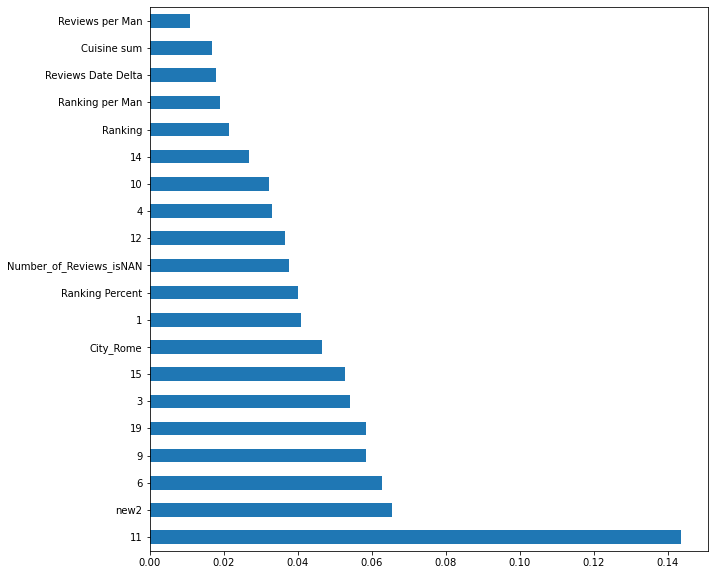

In [154]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')